

 
 <img src=http://thecontextofthings.com/wp-content/uploads/2017/01/employee-attrition.jpg width='50%'/>
 
  
 `" Managers tend to blame their turnover problems on everything under the sun, while ignoring the crux of the matter: people don't leave jobs; they leave managers."`
 
 `by Travis BradBerry`

# Import Package

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
pd.options.display.max_columns=99

In [3]:
df = pd.read_csv("TerminationData.csv", parse_dates=['recorddate_key', 'birthdate_key',
                                                     'orighiredate_key', 'terminationdate_key'])
df.head(10)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,2011-12-31,1954-01-03,1989-08-28,1900-01-01,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,2012-12-31,1954-01-03,1989-08-28,1900-01-01,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,2013-12-31,1954-01-03,1989-08-28,1900-01-01,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,2014-12-31,1954-01-03,1989-08-28,1900-01-01,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [5]:
df.job_title.unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

In [6]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

## Data Description

- EmployeeID : ID Karyawan (Tetapi Tidak Unique)
- recorddate_key : Tanggal Data direcord
- birthdate_key : Tanggal lahir karyawan
- orighiredate_key : Tanggal Masuk Karyawan
- terminationdate_key : Tanggal terminate
- age : Usia
- length_of_service : Masa Kerja
- city_name : Nama Kota
- department_name : Nama Departemen
- Job_Title : Jabatan Karyawan
- store_name : Nama Toko
- gender_short : Jenis Kelamin
- gender_full : Jenis Kelamin
- termreason_desc : Alasan berhenti
- termtype_desc : Jenis termination
- STATUS_YEAR : Tahun record data
- STATUS : Status karyawan
- Business Unit : BU karyawan

# Data Exploration

## Data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
EmployeeID             49653 non-null int64
recorddate_key         49653 non-null datetime64[ns]
birthdate_key          49653 non-null datetime64[ns]
orighiredate_key       49653 non-null datetime64[ns]
terminationdate_key    49653 non-null datetime64[ns]
age                    49653 non-null int64
length_of_service      49653 non-null int64
city_name              49653 non-null object
department_name        49653 non-null object
job_title              49653 non-null object
store_name             49653 non-null int64
gender_short           49653 non-null object
gender_full            49653 non-null object
termreason_desc        49653 non-null object
termtype_desc          49653 non-null object
STATUS_YEAR            49653 non-null int64
STATUS                 49653 non-null object
BUSINESS_UNIT          49653 non-null object
dtypes: datetime64[ns](4), int64(5), object(9)
memory 

## Data Exploration for Numerical Data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,49653.0,4859.495740,1826.571142,1318.0,3360.0,5031.0,6335.0,8336.0
age,49653.0,42.077035,12.427257,19.0,31.0,42.0,53.0,65.0
length_of_service,49653.0,10.434596,6.325286,0.0,5.0,10.0,15.0,26.0
store_name,49653.0,27.297605,13.514134,1.0,16.0,28.0,42.0,46.0
STATUS_YEAR,49653.0,2010.612612,2.845577,2006.0,2008.0,2011.0,2013.0,2015.0


## Data Exploration for Categorical Data

In [9]:
df.describe(include=['O'])

,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
count,49653,49653,49653,49653,49653,49653,49653,49653,49653
unique,40,21,47,2,2,4,3,2,2
top,Vancouver,Meats,Meat Cutter,F,Female,Not Applicable,Not Applicable,ACTIVE,STORES
freq,11211,10269,9984,25898,25898,48168,48168,48168,49068


## Check Missing Value

In [10]:
df.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

There isnt any Missing value in the Dataset

## Check Imbalance Data

In [11]:
df.STATUS.value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

the Dataset is Imbalance, its normal because this dataset is used as Detection Tools

## Check Outlier for Numerical Data

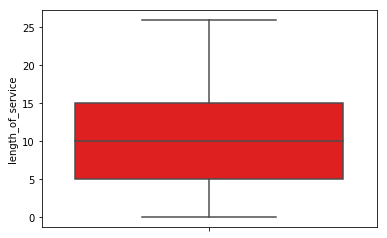

In [12]:
sns.boxplot(df.length_of_service, orient='v', color='r')

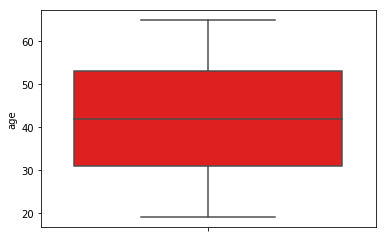

In [13]:
sns.boxplot(df.age, orient='v', color='r')

There isnt any Outlier data in numerical data

# Pre-Eliminary Observation

Observasi Awal :
1. Dataset Imbalance, karena dataset memang digunakan untuk Detection (Akan dihandle di bagian Modelling)
2. Dataset terdiri dari Data Numerik dan Kategorik
3. Ada fitur gender yg redundant yaitu Gender_sort dan Gender_full, salah satu akan di drop karena memiliki fungsi yg sama.
4. Tanggal lahir dan Usia memiliki kesamaan fungsi, sehingga salah satu akan di drop
5. Jika karyawan aktif, termination date nya 1/1/1900
6. Karyawan yg sudah diterminate memiliki data valid untuk termination date, termination reason dan termination type. sehingga 3 fitur ini tidak dapat digunakan ketika training model karena tidak termasuk predictor
7. fitur status_year dan record_date memiliki informasi yg sama.
8. kolom STATUS merupakan target prediksi, sehingga value nya harus dikonversi menjadi Numerik 

Beberapa perubahan terkait feature untuk kebutuhan pe-model-an akan dilakukan di bagian Feature Engineering

## Analyze Dataset by Visualizing

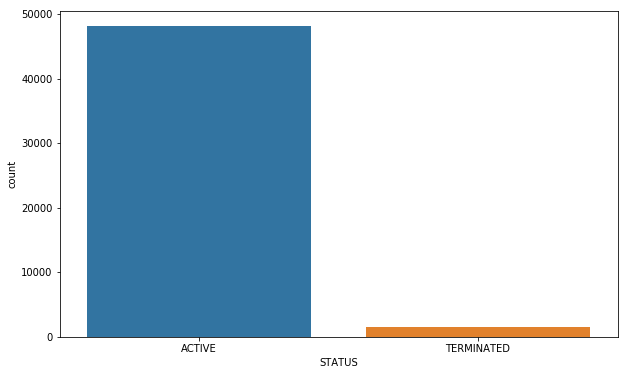

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(df.STATUS)

### Split dataset to be 2 new dataset based on Employment Status

In [15]:
df_active = df[df['STATUS'] == 'ACTIVE'].copy()
df_terminated = df[df['STATUS'] == 'TERMINATED'].copy()

df_active : Dataset untuk karyawan aktif
df_terminated : Dataset karyawan yg sudah diterminate

#### Plot Function

In [16]:

def plot_cat(col):
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    sns.countplot(data=df_active, x = col)
    plt.xticks(rotation=60)
    plt.xlabel('Active Employee')
    
    plt.subplot(122)
    sns.countplot(data=df_terminated, x = col)
    plt.xticks(rotation=60)
    plt.xlabel('Terminated Employee')

### Comparing the Dataset by Demographical

#### Compare the Gender

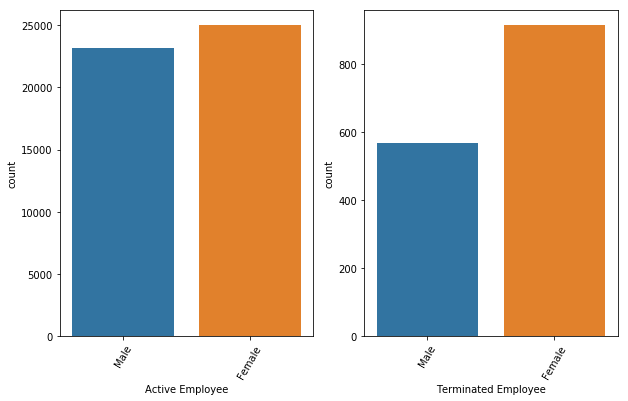

In [17]:
plot_cat('gender_full')

**insight** Meskipun secara jumlah karyawan aktif, ada perbedaan signifikan antara Laki-laki dan perempuan, tetapi untuk karyawan berstatus terminate, perbedaannya tidak signifikan. 

#### Comparing the Age & Length of Service

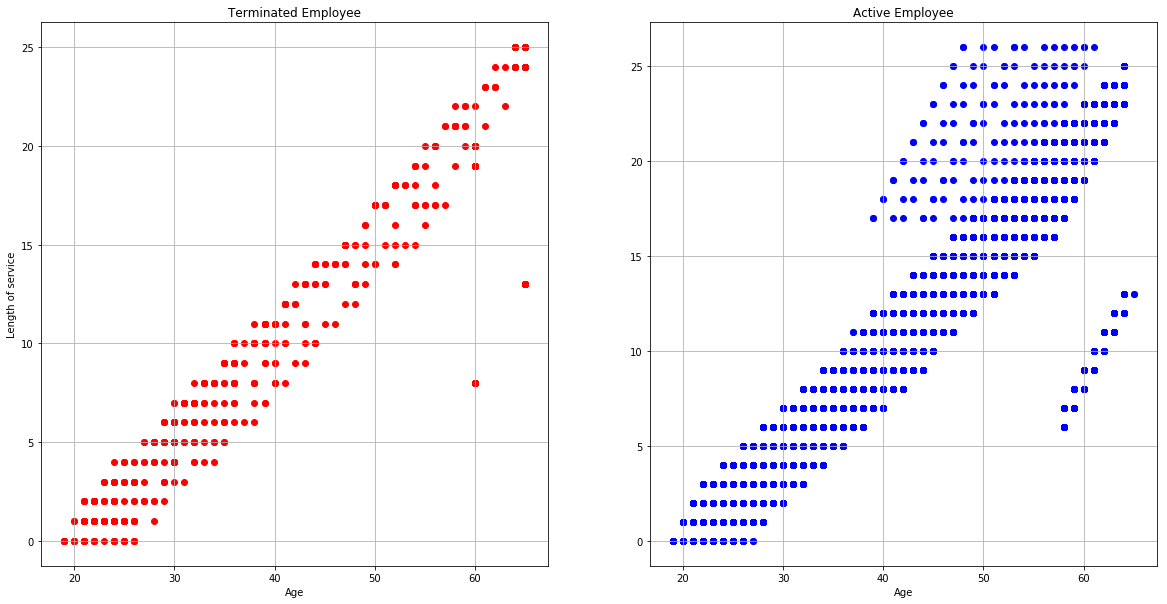

In [18]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.scatter(df_terminated.age, df_terminated.length_of_service, color='r')
plt.xlabel('Age')
plt.ylabel('Length of service')
plt.title('Terminated Employee')
plt.grid(True)

plt.subplot(122)
plt.scatter(df_active.age, df_active.length_of_service, color='b')
plt.xlabel('Age')
plt.title('Active Employee')
plt.grid(True);

**insight** Jika dilihat dari masa kerja dan usia, jumlah karyawan yg terminate di rentang usia 20-30 dan masa kerja 0-5 tahun mendominasi dibanding yg lain.

### Grouping the Age by Generation

In [19]:
df_active.age.describe()

count    48168.000000
mean        41.787805
std         12.165319
min         19.000000
25%         31.000000
50%         42.000000
75%         52.000000
max         65.000000
Name: age, dtype: float64

In [20]:
df_terminated['gen'] = pd.cut(df_terminated.age, bins=[19,25,35,45,55,65], labels=[0,1,2,3,4])
df_terminated.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,gen
48168,1338,2009-02-01,1949-02-16,1989-09-20,2009-02-16,60,19,Vancouver,Training,"Director, Training",35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,4
48169,1339,2014-02-01,1949-02-19,1989-09-22,2014-02-19,65,24,Nelson,Store Management,Store Manager,19,F,Female,Retirement,Voluntary,2014,TERMINATED,STORES,4
48170,1340,2009-02-01,1949-02-19,1989-09-22,2009-02-19,60,19,Kelowna,Store Management,Store Manager,16,M,Male,Retirement,Voluntary,2009,TERMINATED,STORES,4
48171,1341,2009-02-01,1949-02-21,1989-09-23,2009-02-21,60,19,Vancouver,Labor Relations,"Director, Labor Relations",35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,4
48172,1343,2014-02-01,1949-02-24,1989-09-25,2014-02-24,65,24,Victoria,Store Management,Store Manager,37,F,Female,Retirement,Voluntary,2014,TERMINATED,STORES,4


#### Analyze Termination data by Generation group and Length of Service

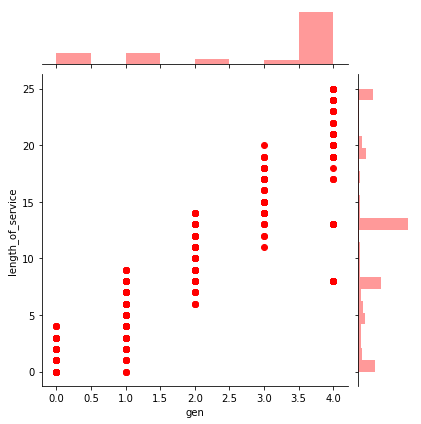

In [21]:
sns.jointplot(df_terminated.gen, df_terminated.length_of_service, color='r')

#### Asumsi

1. Puncak tertinggi dari Age-Gen adalah yg berusia antara (55-65) tahun dan masa kerja sekitar 25 tahun, sesuai yg kita ketahui, itu adalah masa pensiun.
2. Yang kedua dari kelompok age-gen usia antara 19 - 25 tahun, dengan masa kerja dibawah 5 tahun, mengindikasikan generasi muda yg ingin mencari pekerjaan sesuai minat mereka.
3. Ketiga adalah kelompok usia 26 - 35 tahun dengan masa kerja sekitar 10 tahunan, mengindikasikan mereka yg jenuh dengan karir sekarang dan ingin berganti karir dan atau mereka yg sudah memiliki keluarga, dan keluarga mempengaruhi keputusan mereka untuk berhenti dari perusahaan sekarang.
4. Beberapa kelompok usia 55-65 pensiun di masa kerja 10 - 15 tahun. Biasanya mereka yg join ke perusahaan di usia middle-age (sekitar 40 tahunan)

#### Analyze Data by Business Unit

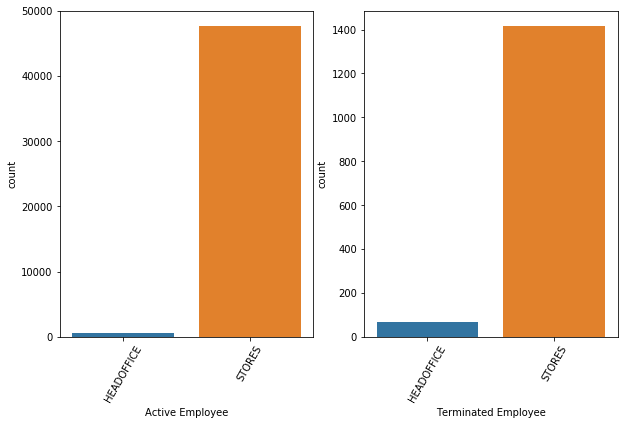

In [22]:
plot_cat('BUSINESS_UNIT')

**insight** Jika dilihat, ada perbedaan jumlah yg signifikan antara karyawan di BU store dan Headoffice

### Categorize the Job Level and Department Name

#### Categorize Job Level

Kelompokkan Job Title sesuai level, jika dilihat secara seksama, ada 4 kelompok besar
1. Staff
2. Manager (title Manager)
3. Board (Director Level)
4. Executive (C - Level)

In [23]:
staff = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

#### Function to Categorize Job Level

In [24]:
def job_cat(x):
    if x in staff:
        x = 0
    elif x in manager:
        x = 1
    elif x in board:
        x = 2
    else:
        x = 3
    return x

In [25]:
df_terminated['job_level'] = df_terminated.job_title.apply(job_cat)

#### Categorize Department Name

Kelompokkan departemen berdasarkan tugas utama departemen tersebut,
ada dua kelompok utama, yaitu departemen yg mengurusi Core bisnis dari Store yaitu melayani kebutuhan pelanggan
dan departemen yg berfungsi sebagai support dan mengurusi kebutuhan dari bisnis itu sendiri
sehingga ada 2 kelompok yaitu : 
1. Customer
2. Business

In [26]:
customer = ['Meats', 'Dairy', 'Produce', 'Bakery', 'Customer Service', 'Processed Foods']

business = ['Store Management', 'Executive', 'Recruitment', 'HR Technology',
             'Accounting', 'Employee Records', 'Accounts Receiveable',
             'Accounts Payable', 'Labor Relations', 'Training', 'Compensation',
             'Audit', 'Investment', 'Information Technology', 'Legal']

#### Function to Categorize Department Name

In [27]:
def dept_cat(x):
    if x in customer:
        x = 'Customer'
    else:
        x = 'Business'
    return x

In [28]:
df_terminated['dept_category'] = df_terminated['department_name'].apply(dept_cat)

### Analyze Termination Data by Department Category, Job Level, Age and Length of Service

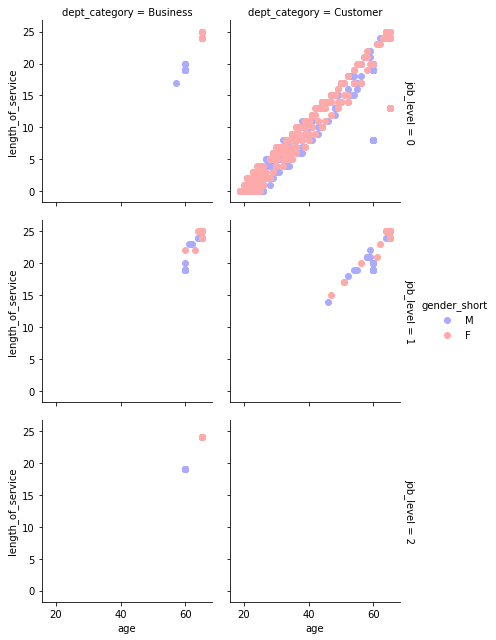

In [29]:
g = sns.FacetGrid(df_terminated, col='dept_category', row='job_level', palette='bwr', 
                  hue='gender_short', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

### Analyze Termination Data By dept_category, termination reason, termination type, age and length of service

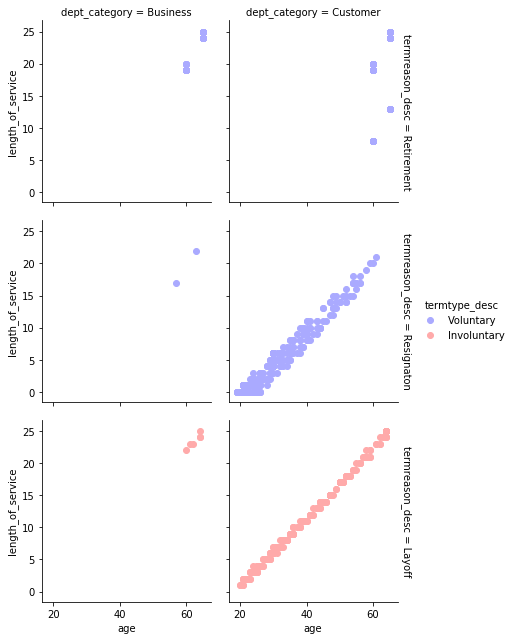

In [30]:
g = sns.FacetGrid(df_terminated, col='dept_category', row='termreason_desc', palette='bwr', 
                  hue='termtype_desc', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

**Insight** :

1. Employee yg bekerja dibagian core pekerjaan handle Customer sebagian besar terkena dampak Layoff(Efiensi), hanya sebagian kecil dari Employee yg dibagian Supporting (Business) yg terkena Layoff, kalaupun terkena, hanya yg usia 50 tahun keatas dan memiliki masa kerja diatas 20 tahun.
2. Hanya sedikit Employee di departemen yg handle customer yg berhenti karena pensiun.
3. Employee yg berhenti bekerja dari departemen supporting (Business) sebagian besar berusia diatas 50 tahun, dan jumlahnya sedikit jika dibanding Employee yg bekerja di departemen Core (Customer) 

### Analyze Termination Employee Data by Termination Reason, Job Level, Age and Length of Service

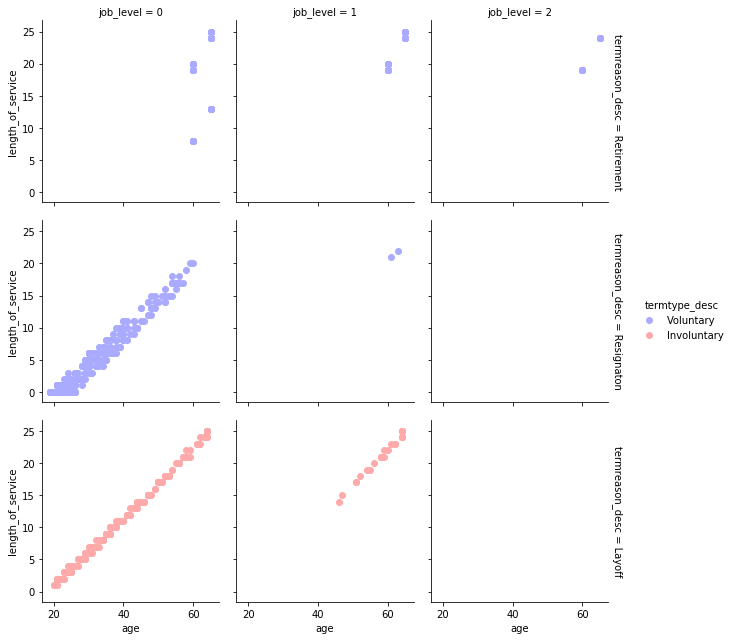

In [31]:
g = sns.FacetGrid(df_terminated, col='job_level', row='termreason_desc', palette='bwr', 
                  hue='termtype_desc', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

Beberapa **Insight** yg dapat diambil dari grafik diatas :
1. Tidak ada Employee dengan level Executive yg berhenti bekerja dari perusahaan.
2. Penyebab Employee level Director berhenti dari perusahaan adalah Pensiun (Retirement), Tidak ada yg berhenti karena Resign maupun terkena Efisiensi(Layoff)
3. Pada Employee Level Manager, sedikit yg mengajukan Resign, beberapa berhenti karena pensiun kebanyakan memiliki masa kerja diatas 20 tahun.
4. Ketika terjadi Efisiensi (Layoff), Employee level Staff paling terkena dampaknya, selanjutnya adalah beberapa manager (yang kemungkinan karena under-perform)
5. Penyebab Employee Level Staff berhenti adalah karena terkena proses Efisiensi dan maupun memang mengajukan Resign (Pengunduran diri), sedikit dari Employee level Staff yg berhenti karena Pensiun.

### Analyze Data Terminated Employee by Record Year

Text(0.5, 0, 'Terminated Employee')

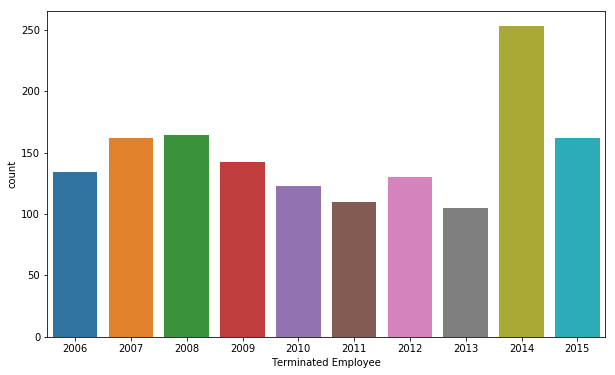

In [32]:
plt.figure(figsize=(10,6))

sns.countplot(data=df_terminated, x = 'STATUS_YEAR')
plt.xlabel('Terminated Employee')

**Insight** :

Berdasarkan grafik diatas, terlihat kenaikan karyawan terjadi pada tahun 2014, untuk penyebabnya harus melakukan observasi lebih jauh bersama dengan tim HR.

## Analyze the Data by Describing the Data

### Analyze Gender and STATUS

In [33]:
df_gender = pd.crosstab(df.STATUS, df.gender_full).T
df_gender['%Terminate'] = (df_gender.TERMINATED / (df_gender.ACTIVE+df_gender.TERMINATED)) *100
df_gender

STATUS,ACTIVE,TERMINATED,%Terminate
gender_full,,,
Female,24983,915,3.533091
Male,23185,570,2.399495


**Insight** : Dari segi gender, tidak ada perbedaan signifikan untuk persentase karyawan yg diterminate

### Analyze by Department Name

In [34]:
pd.crosstab(df.STATUS, df.department_name).T

STATUS,ACTIVE,TERMINATED
department_name,,
Accounting,53,6
Accounts Payable,30,4
Accounts Receiveable,34,5
Audit,20,4
Bakery,8269,112
Compensation,20,4
Customer Service,6860,262
Dairy,8408,191
Employee Records,38,6


**insight** Hanya bagian Executive yg tidak ada karyawan terminate

### Analyze Data by Business Unit

In [35]:
df_BU = pd.crosstab(df.STATUS, df.BUSINESS_UNIT).T
df_BU['%Terminate'] = (df_BU.TERMINATED / (df_BU.ACTIVE+df_BU.TERMINATED)) *100
df_BU

STATUS,ACTIVE,TERMINATED,%Terminate
BUSINESS_UNIT,,,
HEADOFFICE,516,69,11.794872
STORES,47652,1416,2.885791


**Insight** ada 2 Bisnis unit yg ada, yaitu Headoffice dan Store, secara jumlah karyawan store jauh lebih banyak yg terminate, tetapi secara presentase, karyawan di BU Headoffice lebih banyak yg terminate.

### Analyze by city name

In [39]:
df_city = pd.crosstab(df.STATUS, df.city_name).T
df_city['%Terminate'] = (df_city.TERMINATED / (df_city.ACTIVE+df_city.TERMINATED)) *100
df_city

STATUS,ACTIVE,TERMINATED,%Terminate
city_name,,,
Abbotsford,663,18,2.643172
Aldergrove,509,11,2.115385
Bella Bella,121,5,3.968254
Blue River,8,1,11.111111
Burnaby,2033,34,1.644896
Chilliwack,1135,32,2.742074
Cortes Island,37,6,13.953488
Cranbrook,1752,33,1.848739
Dawson Creek,111,18,13.953488


**insight** dari segi nama kota, hampir ada karyawan terminate di setiap kota